In [4]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mtlb
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


## Dataset description

- Description des données

 **Index**

- **DELIVERY_START** : date et heure de livraison de l'électricité

**Variables explicatives**

- **load_forecast** : prévision de consommation totale d'éléctricité en France
- **coal_power_available, gas_power_available, nucelear_power_available** : capacité de production totale d'électricité des centrales à charbon, gaz et nucléaire respectivement,
- **wind_power_forecasts_average, solar_power_forecasts_average** : moyenne de différentes prévisions de production totale d'électricité éolienne et solaire (respectivement),
- **wind_power_forecasts_std, solar_power_forecasts_std** : écart-type de ces mêmes prévisions,
- **predicted_spot_price** : prévision du prix SPOT de l'électricité issues d'un modèle interne de Elmy. Ce modèle est lancé chaque jour avant la fermeture des enchères SPOT pour le lendemain.

**Variable cible**

- **spot_id_delta** : l'écart entre le VWAP des transactions sur le marché infra-journalier (Intraday) et le prix SPOT pour 1MWh d'électricité (spot_id_delta = Intraday - SPOT) : si la valeur est positive, le prix Intraday est supérieur au prix SPOT et inversement

### Reading Dataset

In [5]:
X_train = pd.read_csv("X_train_Wwou3IE.csv")
y_train = pd.read_csv("y_train_jJtXgMX.csv")
df = pd.concat([X_train, y_train["spot_id_delta"]], axis=1).rename(columns={"nucelear_power_available":"nuclear_power_available"})


#### Dataset overview

In [6]:
df

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN,-36.874770
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN,-12.643588
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN,-1.950193
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN,1.938272
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74,17.559407


In [7]:
df.shape

(10605, 11)

**Insight**:

The Dataframe has 10605 rows and 11 columns (with one which is the interest variable)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  9318 non-null   float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10581 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10581 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
 10  spot_id_delta                  10605 non-null  float64
dtypes: float64(10), object(1)
memory usage: 911.5+ KB


**Insight**:

- Most of the variables are Float 
- Delivery start variable is String type and will not be useful for the regression/classification task

In [9]:
# Displays some raws of the dataframe
print("\nSample of the dataset:")
df.sample(10)


Sample of the dataset:


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
9232,2023-01-30 18:00:00+01:00,76017.0,2806.0,11945.0,44430.0,3221.0,85.0,82.445302,3.304638,174.77,15.410455
8787,2023-01-12 05:00:00+01:00,51524.0,3386.0,11945.0,46265.0,14550.0,0.0,27.368700,0.000000,68.99,-2.633952
9729,2023-02-20 11:00:00+01:00,61228.0,3391.0,11945.0,43055.0,2026.0,NaN,68.015785,NaN,142.83,-6.104012
4302,2022-07-06 08:00:00+02:00,NaN,2226.0,11140.0,27710.0,1595.0,2928.0,37.781320,21.841676,NaN,1.109649
6508,2022-10-09 06:00:00+02:00,34595.0,2226.0,11277.0,30140.0,4308.0,0.0,195.604485,0.000000,NaN,-27.964353
4428,2022-07-11 14:00:00+02:00,NaN,2226.0,10990.0,28424.0,2344.0,9966.0,58.604607,12.727409,NaN,-8.459715
3498,2022-05-31 20:00:00+02:00,45672.0,2806.0,10840.0,31368.0,2027.0,765.0,161.629254,8.786162,NaN,-12.364052
7089,2022-11-02 11:00:00+01:00,49828.0,2806.0,11945.0,30860.0,3110.0,5999.0,129.509886,26.535708,NaN,9.114583
9187,2023-01-28 21:00:00+01:00,66876.0,3386.0,11945.0,44846.0,3730.0,0.0,122.294142,0.000000,177.15,17.743653
5509,2022-08-25 15:00:00+02:00,50911.0,2226.0,11060.0,25410.0,2269.0,7012.0,203.113454,214.455166,NaN,24.409693


**Insight**:

Some Nan values must be further processed


In [10]:
#Display the dataset of raws of df with at least one Nan value
df[df.isnull().any(axis=1)]

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN,-36.874770
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN,-12.643588
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN,-1.950193
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN,1.938272
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
10554,2023-03-27 21:00:00+02:00,52863.0,3386.0,11952.0,36990.0,1837.0,0.0,136.999062,0.0,NaN,1.540616
10555,2023-03-27 22:00:00+02:00,52783.0,3386.0,11952.0,36990.0,1812.0,0.0,128.421281,0.0,NaN,-1.485172
10556,2023-03-27 23:00:00+02:00,53274.0,3386.0,11952.0,36990.0,1854.0,0.0,106.112440,0.0,NaN,-6.687949
10557,2023-03-28 00:00:00+02:00,50798.0,3386.0,11952.0,36990.0,2050.0,0.0,76.348188,0.0,NaN,7.277778


**Insight**:

- The dataset is of very low quality with near to 80% of its rows filled with Nan values.
- It could be interesting to see how much are there for each column

In [11]:
def count_nan_by_column(dataframe):
    "Displays the number of Nan values for each column"

    for column in df.columns:
        col_value = dataframe[column]
        number_of_nan = col_value.isnull().sum()
        print(f"Number of Nan values for '{column}' column: {number_of_nan}")

    return 0

print("Here the number of Nan values for each column:")
print("______________________________________________")
count_nan_by_column(df)
    

Here the number of Nan values for each column:
______________________________________________
Number of Nan values for 'DELIVERY_START' column: 0
Number of Nan values for 'load_forecast' column: 1287
Number of Nan values for 'coal_power_available' column: 1
Number of Nan values for 'gas_power_available' column: 1
Number of Nan values for 'nuclear_power_available' column: 1
Number of Nan values for 'wind_power_forecasts_average' column: 24
Number of Nan values for 'solar_power_forecasts_average' column: 24
Number of Nan values for 'wind_power_forecasts_std' column: 24
Number of Nan values for 'solar_power_forecasts_std' column: 24
Number of Nan values for 'predicted_spot_price' column: 8759
Number of Nan values for 'spot_id_delta' column: 0


0

**Insight**:

- Most of the Nan values are in the "load_forecast" column with 1287 Nan values and in "predicted_spot_price" column with 8759 Nan values.
- Since there are only 8783 rows with Nan values, there at leasrt roughly 1000 rough with 2 Nan values
- These two columns must be analysed and processed properly

In [12]:
# Summarized Statistical description of the dataset
print("\nStatistical description:")
df.describe()




Statistical description:


,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
count,9318.000000,10604.000000,10604.000000,10604.000000,10581.000000,10581.000000,10581.000000,10581.000000,1846.000000,10605.000000
mean,53725.132968,2819.781592,11463.220671,35393.282252,4512.989415,1919.281353,125.399422,24.997384,140.256024,0.943358
std,11274.194929,495.103588,483.799154,7619.820162,3349.419356,2706.963383,132.152875,43.083977,33.922669,38.093819
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,42.420000,-1567.353547
25%,45336.500000,2226.000000,11140.000000,29005.000000,2036.000000,0.000000,46.818974,0.000000,119.405000,-11.934152
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,140.040000,0.059125
75%,62091.750000,3386.000000,11945.000000,43055.000000,5951.000000,3507.000000,155.325644,35.137019,160.765000,12.190489
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,254.190000,658.961329


**Insight**

**load_forecast**: 
- Seems to be normally distributed
- High level std

**coal_power_available**: 
- Min and max value seem to be too far from the mean

**gas_power_available**: 
- Same thing

**nuclear_power_available**: 
- Same thing 
- High level std 

**wind_power_forecasts_average**: 
- The third quartile seems to be too far from th mean value compared to the std of the variable
- Max value very (very) high

**solar_power_forecasts_average**:
- At least 25 % of the data's equal to 0 
- Very high difference between the third quartile and the median
- Max value very far from the mean. This ca be explained by the fact that sunshine is'nt present everyday

**wind_power_forecasts_std**:
- Very high difference between the third quartile and the max value
- The distribution seems to be right skewed

**solar_power_forecasts_std**:
- Same thing

**predicted_spot_price**:
- Seems to be normally distributed

**spot_id_delta**:
- Seems to be normally distributed with mean near to 0
- The mean is equal to 0 beacause of the existence of negative values







In [13]:
# Check for duplicated rows
print("\nCheck for duplicated rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())


Check for duplicated rows:


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta


**Insight**:

- No duplicated rows


Histograms for all numrical features:


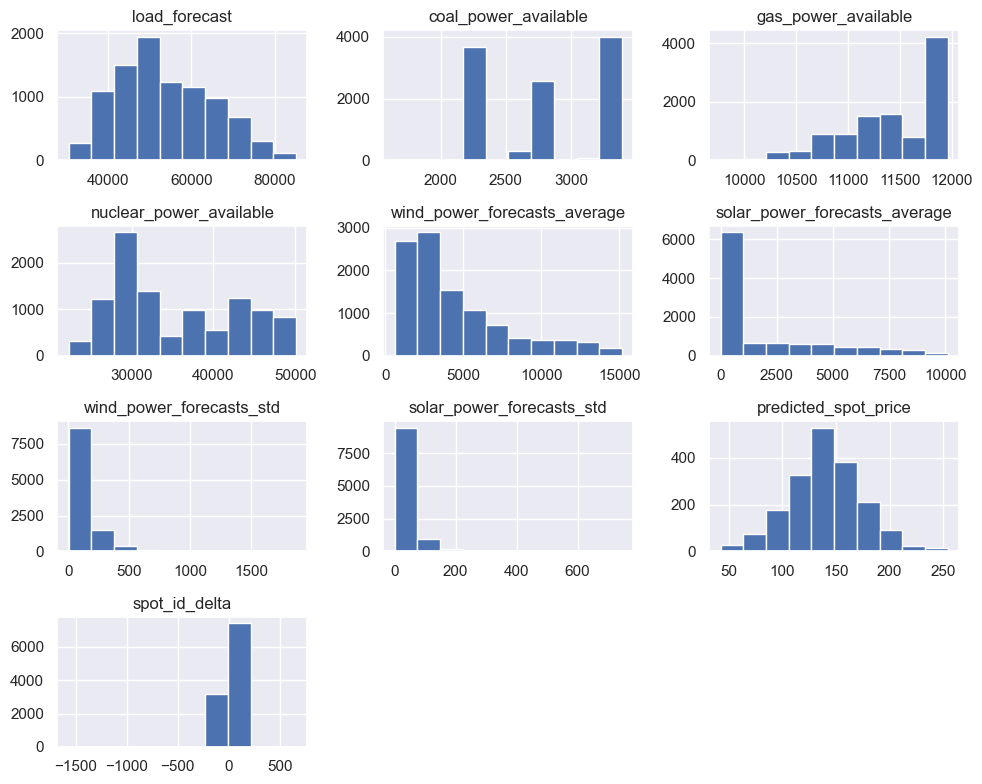

In [14]:
# Histograms for all numrical features
print("\nHistograms for all numrical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insight**:
- The "predicted_spot_price" distribution seems to be gaussian. It could be interesting to replace all its nan values by values genrated by a gaussian law with parameters (mean of existing values, std of existing values)

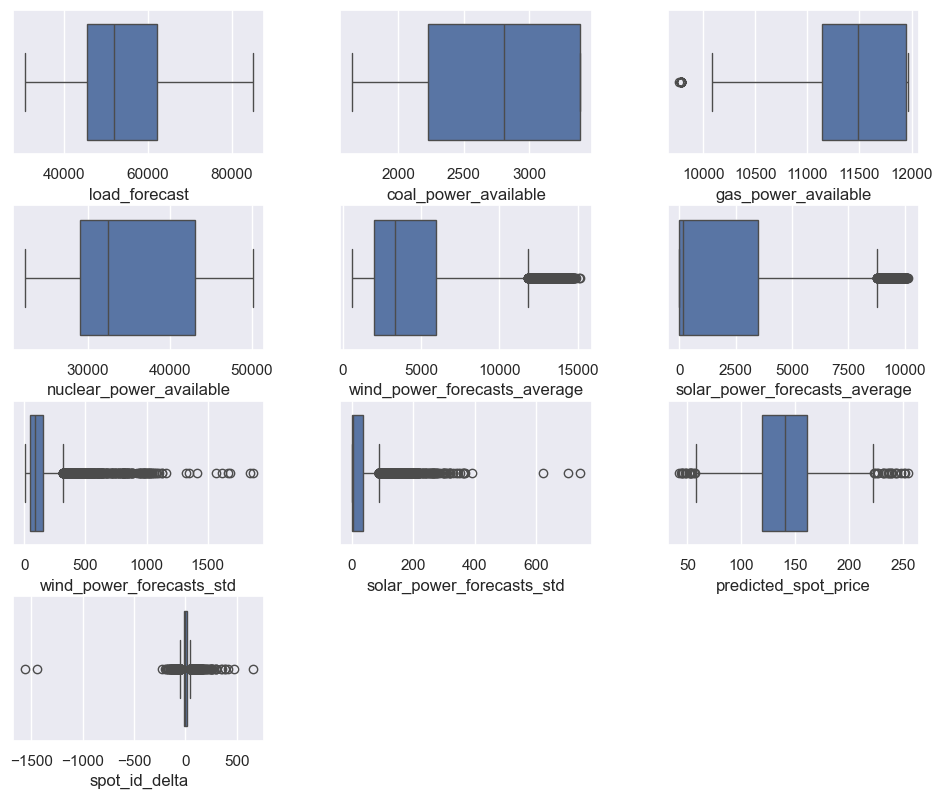

In [15]:
# Boxplots to check for outliers
numeric_cols = ["load_forecast", "coal_power_available", "gas_power_available", 
                "nuclear_power_available", "wind_power_forecasts_average", 
                "solar_power_forecasts_average", "wind_power_forecasts_std",
                "solar_power_forecasts_std", "predicted_spot_price", "spot_id_delta"]

# Defines the number of rows and columns of the future subplot
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Defines the figure
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))
fig.tight_layout()

for index, col in enumerate(numeric_cols):
    row_plot = index // n_cols
    col_plot = index % n_cols
    sns.boxplot(x=df[col], ax=axs[row_plot, col_plot])

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axs.flatten()[j])

    



Correlation Matrix


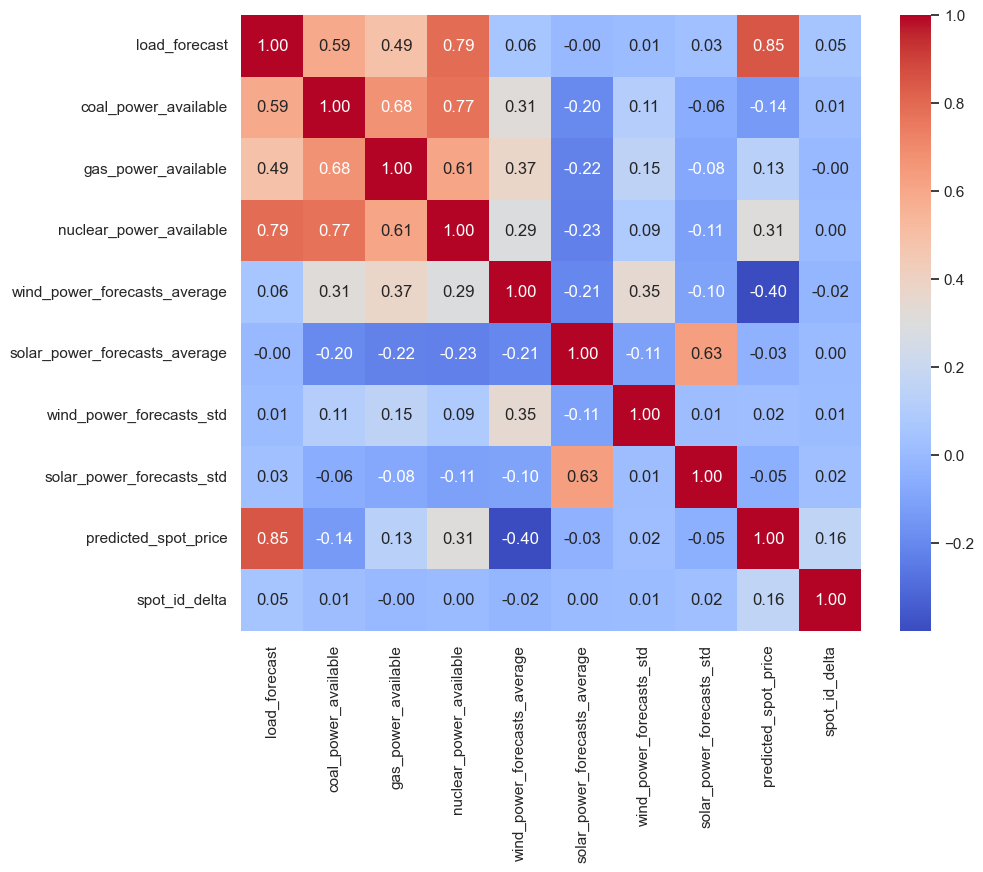

In [16]:
# Create a dataframe of numerical values in order to plot a correlation matrix
df_corr = df[numeric_cols]

print("\nCorrelation Matrix")
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


**Insight**

- There is no variable which seems to have got a linear correlation with the variable of interest
- The variables : "coal_power_available", "gas_power_available", "nuclear_power_available", "predicted_spot_price" have got important linear correlations with the variable "predicted_spot_price"

### Data Preprocessing 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from typing import*

In [18]:
# Filling of na values with -1 for a first time
df.fillna(-1, inplace=True)

In [19]:
# Create a column of labels. 0 when spot_id_delta is negative and 1 otherwise
def sign(number):
    """Returns the sign of the number in parameter"""
    if number < 0:
        return -1
    else:
        return 1
    
def create_labels_column(df=df):
    """Add to the dataframe a column of labels. 0 if the "spot_id_delta is negative, 1 otherwise"""
    labels_column = [sign(value) for value in df["spot_id_delta"]]
    df["labels"] = labels_column

    return df

create_labels_column()
df

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta,labels
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,-1.00,-36.874770,-1
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,-1.00,-12.643588,-1
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,-1.00,-1.950193,-1
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,-1.00,1.938272,1
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,-1.00,0.199907,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303,1
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177,1
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945,1
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74,17.559407,1


In [20]:
# Define the features dataset and the labels dataset
X = df[numeric_cols].drop(columns={"spot_id_delta"})
y = df["labels"]

# Separate them to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale them
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for column in X_train.columns:
    X_train_scaled[column] = scaler.fit_transform(X_train[[column]])
    X_test_scaled[column] = scaler.transform(X_test[[column]])




Here some functions which could be useful for the features selection

In [21]:
def extract_feature_importances(
    X_train: pd.DataFrame, 
    X_test: pd.DataFrame, 
    y_train: Union[pd.Series, np.ndarray], 
    y_test: Union[pd.Series, np.ndarray], 
    da_method: str
) -> pd.DataFrame:
    """
    Train a Random Forest classifier on training data, evaluate it on test data, and extract feature importances.

    Parameters:
    -----------
    X_train : pandas.DataFrame
        The training dataset containing features for training.

    X_test : pandas.DataFrame
        The testing dataset containing features for evaluation.

    y_train : pandas.Series or array-like
        The target labels corresponding to the training dataset.

    y_test : pandas.Series or array-like
        The target labels corresponding to the testing dataset.

    da_method : str
        A string indicating the data augmentation method used (for display purposes). 
        If the data are real the string "no" must be entered

    Returns:
    --------
    pandas.DataFrame
        A DataFrame sorted by feature importance, containing feature names and their corresponding importance scores.
    """

    # Define a Random Forest classifier and train it on the training data
    rf_selection = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_selection.fit(X_train, y_train)

    # Test the model on the testing dataset
    y_rf_selection_predict = rf_selection.predict(X_test)

    # Compute and print the accuracy score of the model
    accuracy = accuracy_score(y_test, y_rf_selection_predict)
    if da_method != "no" :
        print(
            f"Accuracy score of a Random Forest classifier trained on augmented data by {da_method} method: {accuracy}"
        )
    else:
        print(
            f"Accuracy score of a Random Forest classifier trained on real data: {accuracy}"
        )

    # Retrieve the importance of each feature used in the model training
    importances = rf_selection.feature_importances_
    feature_names = X_train.columns

    # Store all the feature importances in a dictionary to convert it into a DataFrame
    dic_feature_importance = {name: [] for name in feature_names}
    for index, name in enumerate(dic_feature_importance):
        dic_feature_importance[name].append(importances[index])

    # Convert the dictionary to a DataFrame
    df_feature_importance = pd.DataFrame(dic_feature_importance)

    # Transpose and sort the DataFrame by feature importance values
    df_feature_importance = df_feature_importance.T
    df_feature_importance.sort_values(by=0, ascending=False, inplace=True)
    df_feature_importance = df_feature_importance.T

    # Return the sorted DataFrame of feature importances
    return df_feature_importance


def select_best_threshold(
    df_importance: pd.DataFrame,
    classif_method: str,
    list_threshold: List[float],
    X: Optional[pd.DataFrame] = [],
    y: Optional[Union[pd.Series, np.ndarray]] = [],
    X_train: Optional[pd.DataFrame] = None,
    X_test: Optional[pd.DataFrame] = None,
    y_train: Optional[Union[pd.Series, np.ndarray]] = None,
    y_test: Optional[Union[pd.Series, np.ndarray]] = None,
) -> pd.DataFrame:
    """
    Select the best threshold for feature selection based on model accuracy and evaluate the model.

    Parameters:
    -----------
    df_importance : pandas.DataFrame
        DataFrame containing feature importances extracted from a trained model.

    classif_method : str
        The classification method to be used ('svm', 'rf', 'knn', 'gnb').

    list_threshold : list of float
        A list of threshold values to test for selecting important features.

    X : pandas.DataFrame, optional
        The complete dataset containing all features (default is None).

    y : pandas.Series or array-like, optional
        The target labels corresponding to the dataset (default is None).

    X_train : pandas.DataFrame, optional
        The training dataset if provided directly (default is None).

    X_test : pandas.DataFrame, optional
        The testing dataset if provided directly (default is None).

    y_train : pandas.Series or array-like, optional
        The training labels if provided directly (default is None).

    y_test : pandas.Series or array-like, optional
        The testing labels if provided directly (default is None).
    
    Notes: Depending on the most useful case, the user can choose between entering the train and test sets or the full characteristics and labels sets.
    ------

    Returns:
    --------
    pandas.DataFrame
        A DataFrame of the selected features using the best threshold.
    sklearn.model
        The best model according to the accuracy_score evaluation
    """

    # Define a dictionary to store accuracies for each threshold
    dic_accuracies = {f"{threshold}": [] for threshold in list_threshold}
    best_threshold = list_threshold[0]  # Initialize the best threshold
    best_model = RandomForestClassifier()

    # If X is provided, split into training and testing sets, and scale features
    if X != []:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        for column in X_train.columns:
            X_train_scaled[column] = scaler.fit_transform(X_train[[column]])
            X_test_scaled[column] = scaler.transform(X_test[[column]])
        X_train = X_train_scaled
        X_test = X_test_scaled

    # Loop over each threshold value to evaluate model performance
    for threshold in list_threshold:
        # Select features that have importance values greater than the current threshold
        selected_features = [
            feature
            for feature in df_importance.columns
            if (df_importance[feature] >= threshold).any()
        ]
        X_train_threshold = X_train[selected_features]
        X_test_threshold = X_test[selected_features]
        X_threshold = pd.concat([X_train_threshold, X_test_threshold])

        # Defines the classifier based on the specified method
        if classif_method == "svm":
            model_threshold = SVC(kernel="rbf", probability=True)
        elif classif_method == "rf":
            model_threshold = RandomForestClassifier(n_estimators=500, random_state=42)
        elif classif_method == "knn":
            model_threshold = KNeighborsClassifier()
        elif classif_method == "gnb":
            model_threshold = GaussianNB()

        # Train the model on the selected features and evaluate it
        model_threshold.fit(X_train_threshold, y_train)
        y_model_threshold_pred = model_threshold.predict(X_test_threshold)

        # Compute the ROC AUC score
        y_model_threshold_scores = model_threshold.predict_proba(X_test_threshold)[:, 1]
        auc_score = roc_auc_score(y_test, y_model_threshold_scores)

        # Compute the accuracy score for this threshold
        accuracy_threshold = accuracy_score(y_test, y_model_threshold_pred)

        # Store the accuracy score in the dictionary
        dic_accuracies[f"{threshold}"].append(accuracy_threshold)

        # Update the best threshold if the current threshold gives better accuracy
        best_accuracy = dic_accuracies[f"{best_threshold}"]
        if best_accuracy <= dic_accuracies[f"{threshold}"]:
            best_threshold = threshold
            best_auc_score = auc_score
            best_confusion_matrix = confusion_matrix(y_test, y_model_threshold_pred)
            best_model = model_threshold

    # Select features using the best threshold
    selected_features = [
        feature
        for feature in df_importance.columns
        if (df_importance[feature] >= best_threshold).any()
    ]
    df_selected_best_threshold = X_train[selected_features]

    # Display the results
    print(f"Here are the results and metrics for the {classif_method} model:")
    print("----------------------------------------------------------")
    print(f"The best threshold is: {best_threshold}")
    print("Selected features:", df_selected_best_threshold.columns)
    print(f"Accuracy score: {best_accuracy}")
    print(f"AUC score: {best_auc_score}")
    print(f"Confusion Matrix:\n{best_confusion_matrix}")
    print(f"Here the dic_accuracies: {dic_accuracies}")


    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        best_confusion_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negatuve", "Positive"],
    )
    plt.xlabel("Predictions")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    return df_selected_best_threshold, best_model

In [22]:
df_importance = extract_feature_importances(X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test, da_method="no")
df_importance



Accuracy score of a Random Forest classifier trained on real data: 0.7643288084464555


,wind_power_forecasts_average,nuclear_power_available,wind_power_forecasts_std,load_forecast,solar_power_forecasts_average,solar_power_forecasts_std,gas_power_available,predicted_spot_price,coal_power_available
0,0.192077,0.171863,0.167682,0.153751,0.087386,0.084128,0.078841,0.034196,0.030073


wind_power_forecasts_average     0.192077
nuclear_power_available          0.171863
wind_power_forecasts_std         0.167682
load_forecast                    0.153751
solar_power_forecasts_average    0.087386
solar_power_forecasts_std        0.084128
gas_power_available              0.078841
predicted_spot_price             0.034196
coal_power_available             0.030073
Name: 0, dtype: float64


C:\Users\eliel\AppData\Local\Temp\ipykernel_14608\136531238.py:130: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_threshold = list_threshold[0]  # Initialize the best threshold


Here are the results and metrics for the rf model:
----------------------------------------------------------
The best threshold is: 0.030073260464830498
Selected features: Index(['wind_power_forecasts_average', 'nuclear_power_available',
       'wind_power_forecasts_std', 'load_forecast',
       'solar_power_forecasts_average', 'solar_power_forecasts_std',
       'gas_power_available', 'predicted_spot_price', 'coal_power_available'],
      dtype='object')
Accuracy score: [0.753393665158371]
AUC score: 0.8361453972515472
Confusion Matrix:
[[1000  312]
 [ 301 1039]]
Here the dic_accuracies: {'0.19207710315022292': [0.48642533936651583], '0.17186340891950258': [0.6896681749622926], '0.16768244351110367': [0.6711915535444947], '0.15375144289927248': [0.7122926093514329], '0.08738645563140099': [0.7092760180995475], '0.0841282223775046': [0.6998491704374057], '0.07884127610481358': [0.753393665158371], '0.03419638694134873': [0.7473604826546003], '0.030073260464830498': [0.7688536953242836

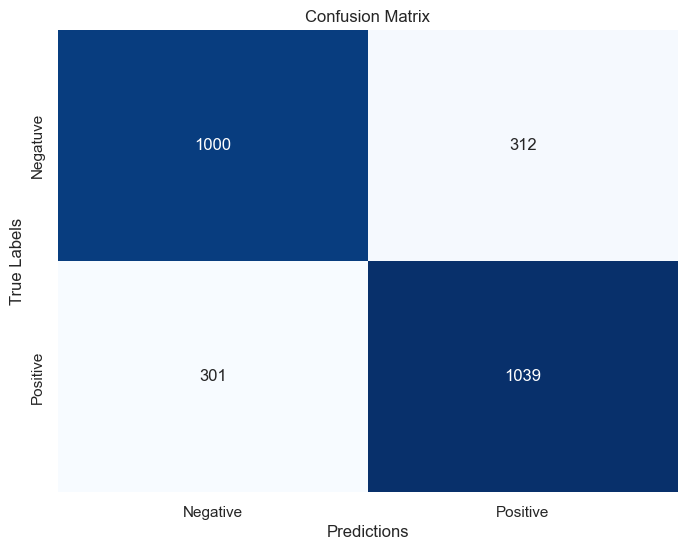

In [23]:
list_threshold = df_importance.iloc[0, :]
print(list_threshold)
df_selected_best_threshold, model_selected_best_threshold = select_best_threshold(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, df_importance=df_importance, classif_method="rf", list_threshold=list_threshold)

**Insight**:
The features selection by features importances seems to be unuseful when Nan values are replaced by -1

In [24]:
df_selected_best_threshold
list_threshold = df_importance.iloc[0, :]
print(list_threshold)

wind_power_forecasts_average     0.192077
nuclear_power_available          0.171863
wind_power_forecasts_std         0.167682
load_forecast                    0.153751
solar_power_forecasts_average    0.087386
solar_power_forecasts_std        0.084128
gas_power_available              0.078841
predicted_spot_price             0.034196
coal_power_available             0.030073
Name: 0, dtype: float64


In [25]:
df_test = pd.read_csv("X_test_GgyECq8.csv")
DELIVERY_START = df_test["DELIVERY_START"]
df_test.drop(columns={"DELIVERY_START"}, inplace=True)
df_test.rename(columns={"nucelear_power_available":"nuclear_power_available"}, inplace=True)
df_test.fillna(-1, inplace=True)

df_test

,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,-1.00
1,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,-1.00
2,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,-1.00
3,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,-1.00
4,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,-1.00
...,...,...,...,...,...,...,...,...,...
4937,49686.0,2226.0,11749.0,42980.0,4901.0,0.0,247.887323,0.0,125.67
4938,53397.0,2226.0,11749.0,42980.0,5584.0,0.0,343.192642,0.0,139.58
4939,50586.0,2226.0,11749.0,42980.0,6306.0,0.0,471.875973,0.0,147.93
4940,46777.0,2226.0,11749.0,42980.0,6959.0,0.0,595.528100,0.0,122.20


In [26]:
y_predict = model_selected_best_threshold.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [27]:
# Because of the difficulties of the selected model to be tested on the test set we train a new Random Forest Classifier on the train set
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10, min_samples_leaf=5)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print(f"The Accuracy Score for this model is : {accuracy_score(y_test, y_pred)}")
rf_model.get_params()

The Accuracy Score for this model is : 0.6693061840120663


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
y_pred_bis = rf_model.predict(df_test)
print(DELIVERY_START)

0       2023-04-02 00:00:00+02:00
1       2023-04-02 01:00:00+02:00
2       2023-04-02 02:00:00+02:00
3       2023-04-02 03:00:00+02:00
4       2023-04-02 04:00:00+02:00
                  ...            
4937    2023-10-24 19:00:00+02:00
4938    2023-10-24 20:00:00+02:00
4939    2023-10-24 21:00:00+02:00
4940    2023-10-24 22:00:00+02:00
4941    2023-10-24 23:00:00+02:00
Name: DELIVERY_START, Length: 4942, dtype: object


In [31]:
submission = pd.DataFrame(
                           {"DELIVERY_START": DELIVERY_START,
                           "spot_id_delta": y_pred_bis}
                           )
print(submission)
print(df_test)
submission_csv = submission.to_csv("submission_Lelouche.csv", index=False, sep=",")

                 DELIVERY_START  spot_id_delta
0     2023-04-02 00:00:00+02:00             -1
1     2023-04-02 01:00:00+02:00             -1
2     2023-04-02 02:00:00+02:00             -1
3     2023-04-02 03:00:00+02:00             -1
4     2023-04-02 04:00:00+02:00             -1
...                         ...            ...
4937  2023-10-24 19:00:00+02:00             -1
4938  2023-10-24 20:00:00+02:00             -1
4939  2023-10-24 21:00:00+02:00             -1
4940  2023-10-24 22:00:00+02:00             -1
4941  2023-10-24 23:00:00+02:00             -1

[4942 rows x 2 columns]
      load_forecast  coal_power_available  gas_power_available  \
0           45814.0                3386.0              10902.0   
1           44084.0                3386.0              10902.0   
2           43281.0                3386.0              10902.0   
3           40825.0                3386.0              10902.0   
4           39181.0                3386.0              10902.0   
...            

### Training a model on dataset with nan values replaced by the mean of existing values modulo a gaussian noise


In [84]:
# The goal in this cell is to replace the initially missing values of the "predicted_spot_price"
#  column by the mean of the existing ones moduo a gaussian noise
df_gaussian = df.copy()# So, we create a copy of the former processing dataset,...

# ...we compute the parameters of the gaussian noise (which are: ...
mean_pdsp_positives = df[df["predicted_spot_price"]>=0]["predicted_spot_price"].mean()# ... the mean of existing values and...
std_pdsp_positives = df[df["predicted_spot_price"]>=0]["predicted_spot_price"].std() # ... their standard deviition) ...

# ... generate a gaussian noise of length the number of missing values, ...
num_missing_values = (df["predicted_spot_price"]<0).sum()
gaussian_noise = np.random.normal(mean_pdsp_positives, std_pdsp_positives, num_missing_values)

#... and replacing the missing values by this noise
df_gaussian.loc[df_gaussian["predicted_spot_price"] == -1, "predicted_spot_price"] = gaussian_noise





 Here a plot of the predicted_spot_price variablewith Nan values replaced by gaussian noise


Text(0.5, 1.0, "Plot of 'predicted_spot_price' variable with Nan values replaced by a Gaussian noise")

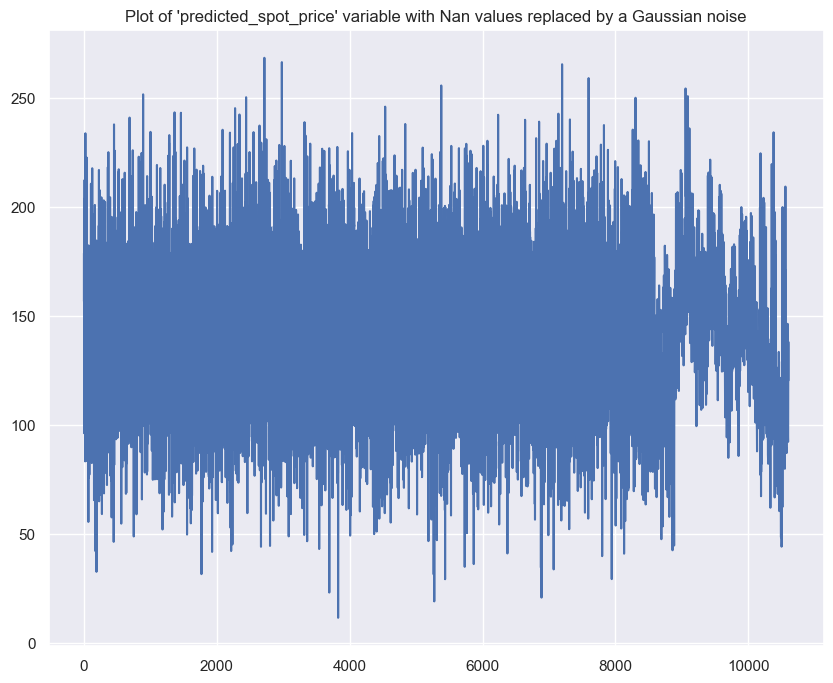

In [182]:
print("\n Here a plot of the predicted_spot_price variablewith Nan values replaced by gaussian noise")

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_gaussian["predicted_spot_price"])
ax.set_title("Plot of 'predicted_spot_price' variable with Nan values replaced by a Gaussian noise")

**Insight**
- The replacing values do not seem to capture the trends variability of the variable 

In [85]:
df_gaussian

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta,labels
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,156.637275,-36.874770,0
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,178.623007,-12.643588,0
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,128.483525,-1.950193,0
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,139.231194,1.938272,1
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,96.087921,0.199907,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.110000,6.029303,1
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.660000,13.576177,1
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.010000,17.478945,1
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.740000,17.559407,1



Correlation Matrix


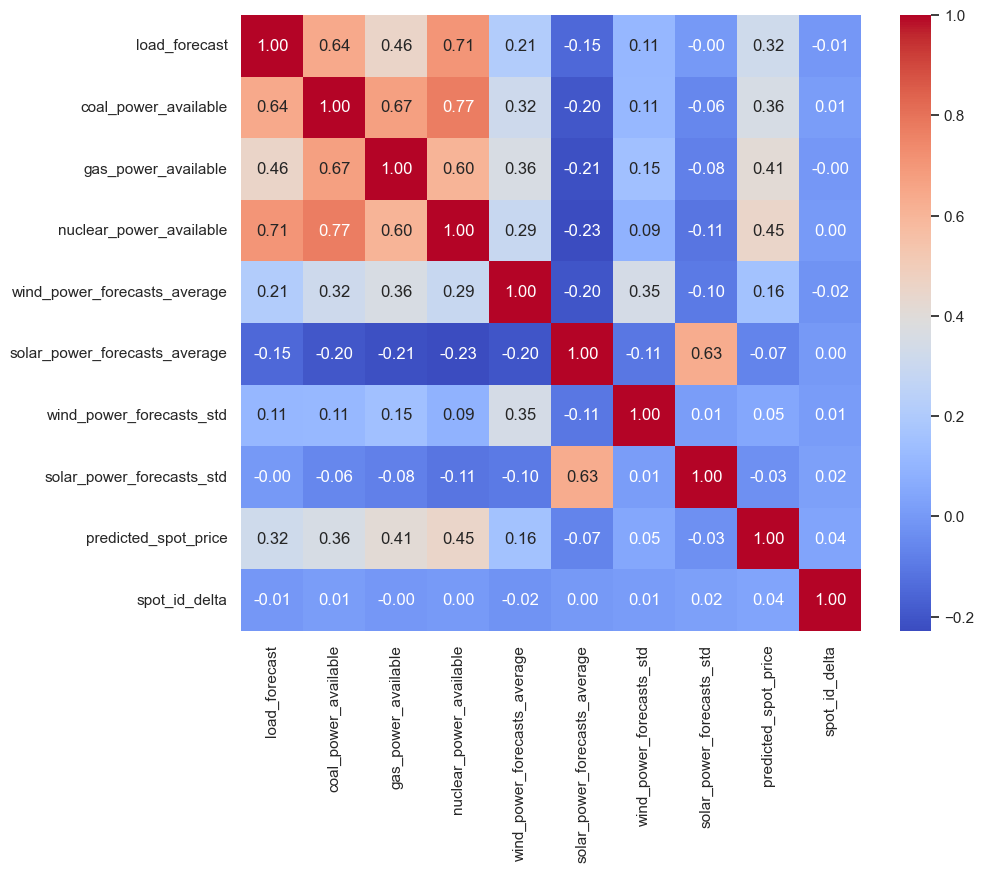

In [87]:
# Create a dataframe of numerical values in order to plot a correlation matrix
df_gaussian_corr = df[numeric_cols]

print("\nCorrelation Matrix")
corr_matrix_gaussian = df_gaussian_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_gaussian, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


**Insight**
- The correlation between "predicted_spot_price" and "spot_id_delta" is lower than without replacing Nan values

In [88]:
# Define the features dataset and the labels dataset
X_gaussian = df_gaussian[numeric_cols].drop(columns={"spot_id_delta"})
y_gaussian = df_gaussian["labels"]

# Separate them to train and test set
X_gaussian_train, X_gaussian_test, y_gaussian_train, y_gaussian_test = train_test_split(X_gaussian, y_gaussian, random_state=42)

In [89]:
df_importance_gaussian = extract_feature_importances(X_train=X_gaussian_train, X_test=X_gaussian_test, y_train=y_gaussian_train, y_test=y_gaussian_test, da_method="no")
df_importance_gaussian

Accuracy score of a Random Forest classifier trained on real data: 0.7643288084464555


,wind_power_forecasts_average,nuclear_power_available,wind_power_forecasts_std,load_forecast,solar_power_forecasts_average,solar_power_forecasts_std,gas_power_available,predicted_spot_price,coal_power_available
0,0.192077,0.171863,0.167682,0.153751,0.087386,0.084128,0.078841,0.034196,0.030073


C:\Users\eliel\AppData\Local\Temp\ipykernel_12216\1299114280.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_threshold = list_threshold[0]  # Initialize the best threshold


Here are the results and metrics for the rf model:
----------------------------------------------------------
The best threshold is: 0.030073260464830498
Selected features: Index(['wind_power_forecasts_average', 'nuclear_power_available',
       'wind_power_forecasts_std', 'load_forecast',
       'solar_power_forecasts_average', 'solar_power_forecasts_std',
       'gas_power_available', 'predicted_spot_price', 'coal_power_available'],
      dtype='object')
Accuracy score: [0.753393665158371]
AUC score: 0.8361453972515472
Confusion Matrix:
[[1000  312]
 [ 301 1039]]
here the dic_accuracies: {'0.19207710315022292': [0.48642533936651583], '0.17186340891950258': [0.6896681749622926], '0.16768244351110367': [0.6711915535444947], '0.15375144289927248': [0.7122926093514329], '0.08738645563140099': [0.7092760180995475], '0.0841282223775046': [0.6998491704374057], '0.07884127610481358': [0.753393665158371], '0.03419638694134873': [0.7473604826546003], '0.030073260464830498': [0.7688536953242836

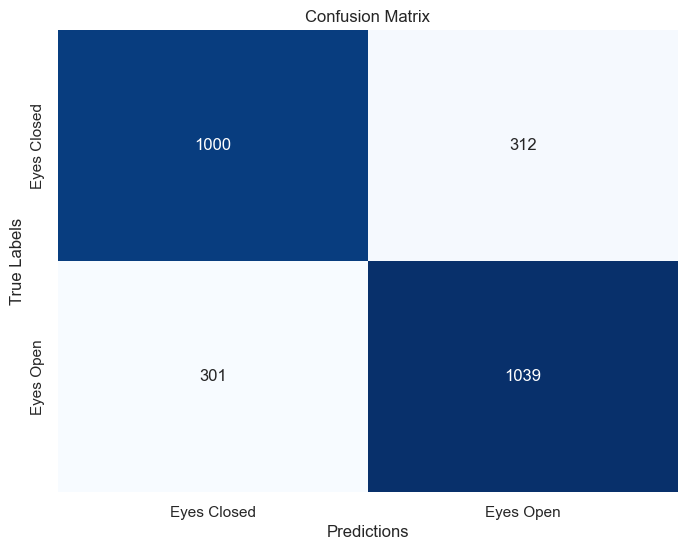

In [90]:
list_threshold = df_importance_gaussian.iloc[0, :]

df_selected_best_threshold_gaussian, model_selected_best_threshold_gaussian = select_best_threshold(X_train=X_gaussian_train, X_test=X_gaussian_test, y_train=y_gaussian_train, y_test=y_gaussian_test, df_importance=df_importance_gaussian, classif_method="rf", list_threshold=list_threshold)

**Insight**
- Following these observations, replacing missing values by a gaussian noise does not seem to bring more efficiency to the model

### Trying a Random Forest Regressor

In [32]:
df

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta,labels
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,-1.00,-36.874770,-1
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,-1.00,-12.643588,-1
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,-1.00,-1.950193,-1
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,-1.00,1.938272,1
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,-1.00,0.199907,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303,1
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177,1
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945,1
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74,17.559407,1


In [33]:
X = df.drop(columns={"DELIVERY_START", "labels", "spot_id_delta"})
y = df["spot_id_delta"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale them
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for column in X_train.columns:
    X_train_scaled[column] = scaler.fit_transform(X_train[[column]])
    X_test_scaled[column] = scaler.transform(X_test[[column]])

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)
print(f"The MSE of the RandomForestRegressor model is: {mean_squared_error(y_test, y_pred)}")

The MSE of the RandomForestRegressor model is: 476.2057760508768


In [46]:
y_pred_test = rf_regressor.predict(df_test)
submission = pd.DataFrame({
    "DELIVERY_START": DELIVERY_START,
    "spot_id_delta": y_pred_test
})
submission_csv = submission.to_csv("submission_Lelouche.csv", index=False, sep=",")


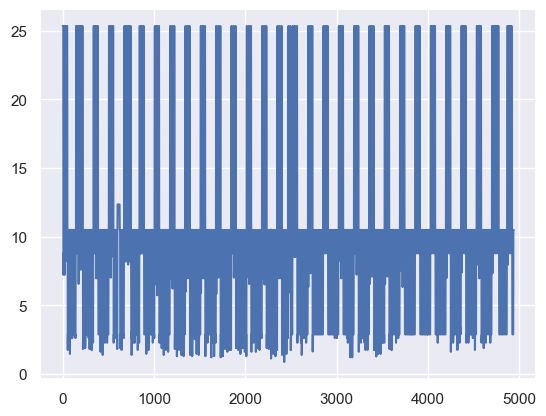

In [43]:
plt.plot(y_pred_test)

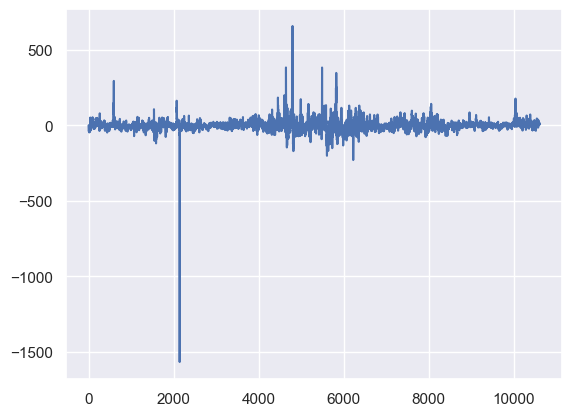

In [45]:
plt.plot(y)